<a href="https://colab.research.google.com/github/Shabnur-Akter/Prediction-Using-Multiple-Model/blob/main/Prediction_Using_Multiple_Model_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine learning/customer_churn_dataset-testing-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
drop_cols = ['CustomerID', 'Age', 'Gender']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,Basic,Monthly,598,9,1
1,28,28,7,13,Standard,Monthly,584,20,0
2,27,10,2,29,Premium,Annual,757,21,0
3,9,12,5,17,Premium,Quarterly,232,18,0
4,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,Basic,Quarterly,947,14,1
64370,6,1,5,22,Standard,Annual,923,9,1
64371,39,14,8,30,Premium,Monthly,327,20,1
64372,18,19,7,22,Standard,Monthly,540,13,1


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,14,4,27,0,1,598,9,1
1,28,28,7,13,2,1,584,20,0
2,27,10,2,29,1,0,757,21,0
3,9,12,5,17,1,2,232,18,0
4,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...
64369,33,12,6,21,0,2,947,14,1
64370,6,1,5,22,2,0,923,9,1
64371,39,14,8,30,1,1,327,20,1
64372,18,19,7,22,2,1,540,13,1


In [10]:
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Here using 3 models
model = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

Model: Decision Tree
Accuracy: 0.8956116504854369
Precision: 0.896021397525911
Recall: 0.8812890496547189
F1 Score: 0.8885941644562334

Confusion Matrix:
[[6171  622]
 [ 722 5360]]

Model: K-Nearest Neighbors
Accuracy: 0.8608932038834951
Precision: 0.8314537308821257
Recall: 0.8849062808286747
F1 Score: 0.8573476702508961

Confusion Matrix:
[[5702 1091]
 [ 700 5382]]

Model: Random Forest
Accuracy: 0.9143300970873787
Precision: 0.8874708171206226
Recall: 0.937520552449852
F1 Score: 0.9118093867434237

Confusion Matrix:
[[6070  723]
 [ 380 5702]]



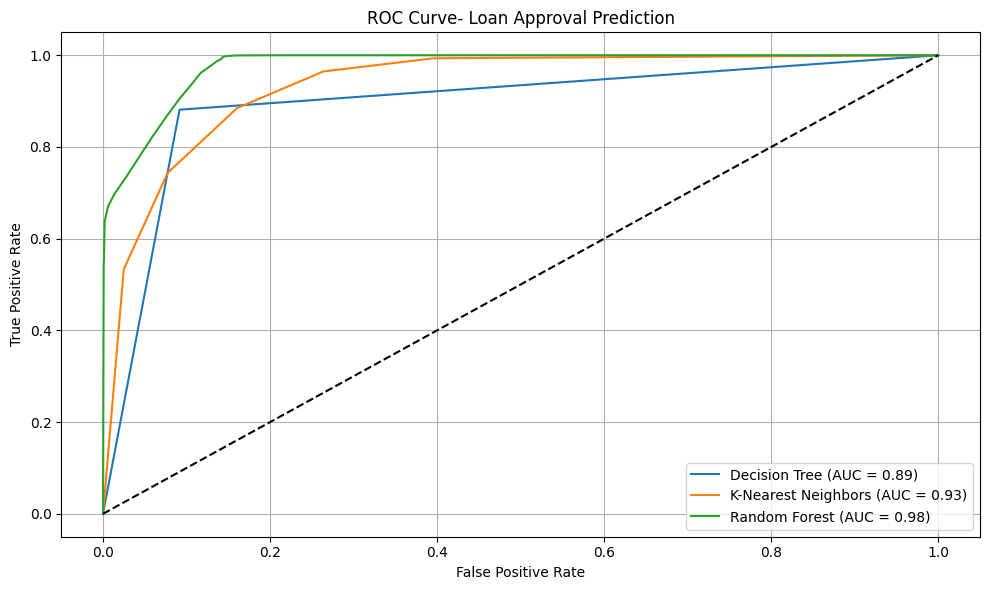

In [15]:
# Model train and Prediction
plt.figure(figsize=(10, 6))
for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve plotting for all 3 models
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Loan Approval Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Multi Class Classification**

In [16]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Machine learning/cyberthreat.csv')
dataset

,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,HTTP,123456,987654,192.168.0.1,10.0.0.5,12345,80,1024,Phishing
1,UDP,ACK,DNS,987654,123456,10.0.0.2,192.168.0.1,53,12345,512,DoS
2,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
3,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
4,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection
...,...,...,...,...,...,...,...,...,...,...,...
745,TCP,SYN,FTP,567890,890123,192.168.1.5,10.0.0.10,21,12345,512,Ransomware
746,UDP,ACK,DNS,901234,678901,10.0.0.15,192.168.0.2,12345,53,256,Password Attacks
747,TCP,SYN,SSH,234567,456789,192.168.0.5,10.0.0.10,22,12345,256,Zero-Day Exploits
748,UDP,ACK,NTP,456789,234567,10.0.0.8,192.168.0.5,123,12345,128,Phishing


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                750 non-null    object
 1   Flag                    750 non-null    object
 2   Packet                  750 non-null    object
 3   Sender ID               750 non-null    int64 
 4   Receiver ID             750 non-null    int64 
 5   Source IP Address       750 non-null    object
 6   Destination IP Address  750 non-null    object
 7   Source Port             750 non-null    int64 
 8   Destination Port        750 non-null    int64 
 9   Packet Size             750 non-null    int64 
 10  Target Variable         750 non-null    object
dtypes: int64(5), object(6)
memory usage: 64.6+ KB


In [18]:
dataset.isnull().sum()

,0
Protocol,0
Flag,0
Packet,0
Sender ID,0
Receiver ID,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Packet Size,0


In [19]:
dataset.describe()

,Sender ID,Receiver ID,Source Port,Destination Port,Packet Size
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,576178.760000,582752.624000,3155.512000,9297.088000,959.488000
std,286422.590855,287956.815104,5282.061308,5311.018757,1154.034583
min,123456.000000,123456.000000,20.000000,20.000000,128.000000
25%,345678.000000,345678.000000,25.000000,12345.000000,256.000000
50%,567890.000000,678901.000000,161.000000,12345.000000,512.000000
75%,789012.000000,890123.000000,443.000000,12345.000000,1024.000000
max,987654.000000,987654.000000,12345.000000,12345.000000,4096.000000


In [20]:
X = dataset.drop('Target Variable', axis=1)
y = dataset['Target Variable']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
class_names

array(['Cross-Site Scripting', 'DDoS', 'DoS', 'Man-in-the-Middle',
       'Password Attacks', 'Phishing', 'Ransomware', 'SQL Injection',
       'Zero-Day Exploits'], dtype=object)

In [25]:
from sklearn.preprocessing import StandardScaler

# Make sure to import pandas and load the CSV
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine learning/cyberthreat.csv')

# Select numeric columns only
numeric_columns = ['Sender ID', 'Receiver ID', 'Source Port', 'Destination Port', 'Packet Size']
X = df[numeric_columns]

# Scale
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine learning/cyberthreat.csv')

# Select numeric features only
features = ['Sender ID', 'Receiver ID', 'Source Port', 'Destination Port', 'Packet Size']
X = df[features]

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['Target Variable'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


In [33]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=31),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=4)
}


Decision Tree Metrics:

Accuracy: 0.52
Precision: 0.5122945206282988
Recall: 0.504077380952381
F1 Score: 0.5046712395623466

Confusion Matrix:
[[19  0  0  0  6  0  0  0]
 [ 2  8  0  0  0  6  0  0]
 [ 0  0  8  6  0  0  0  0]
 [ 0  2  6 12  0  0  0  0]
 [ 8  0  0  0  6  0  0  2]
 [ 0  9  0  0  1 11  0  0]
 [ 0  0  0  1  0  0 10 13]
 [ 0  0  0  0  0  0 10  4]]


K-Nearest Neighbors Metrics:

Accuracy: 0.47333333333333333
Precision: 0.4466157328805886
Recall: 0.4485267857142857
F1 Score: 0.44222058135101616

Confusion Matrix:
[[11  0  1  0 13  0  0  0]
 [ 4  3  0  0  0  9  0  0]
 [ 0  0  7  6  0  0  1  0]
 [ 0  2  6 11  0  1  0  0]
 [ 5  0  0  0  6  3  2  0]
 [ 0  6  0  0  1 12  0  2]
 [ 0  1  0  1  0  0 18  4]
 [ 0  0  0  1  0  0 10  3]]


Random Forest Metrics:

Accuracy: 0.48
Precision: 0.49861953854073876
Recall: 0.4825595238095237
F1 Score: 0.472187957147605

Confusion Matrix:
[[ 8  0  0  0 17  0  0  0]
 [ 0  5  0  0  2  9  0  0]
 [ 0  0  8  6  0  0  0  0]
 [ 0  2  6 12  0  0  0  0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


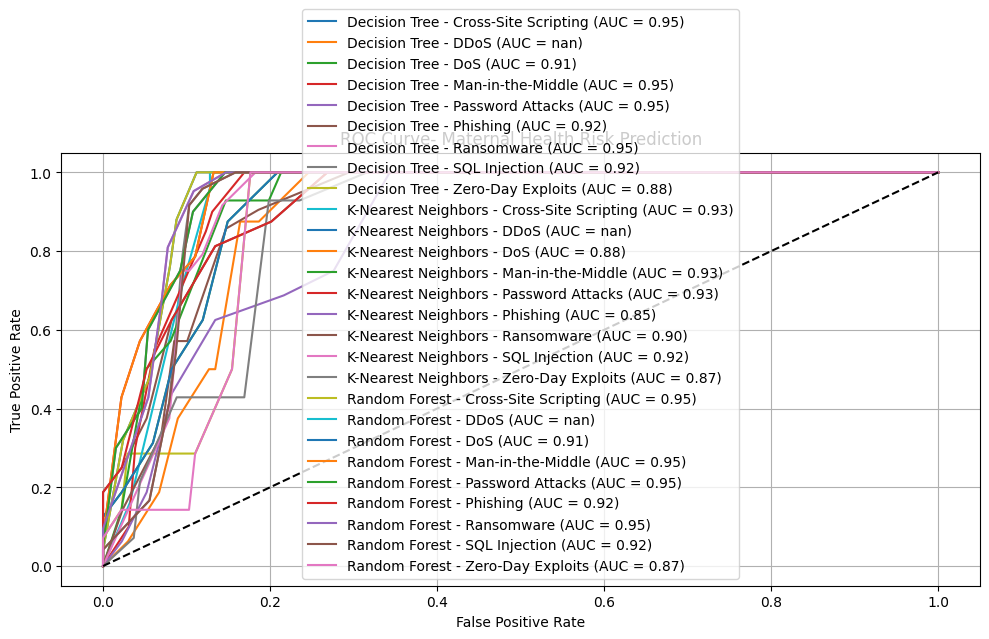

In [34]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test) # for roc-auc value we need this probability

    print(f'\n{name} Metrics:\n')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    y_test_bin = label_binarize(y_test, classes=range(len(class_names)))

    for i in range(len(class_names)):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:,i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {class_names[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Maternal Health Risk Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()